In [2]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

from champ_optics_Model import MCMC_Model,get_mean_err

from glob import glob
from pathlib import PurePath,Path

c:\Users\xiaod\.conda\envs\CCATholo\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def get_samples(data_List):
    data_samples=np.zeros([data_List[0].shape[0],len(data_List)])
    for idx, data in enumerate(data_List):
        data_samples[:,idx] = data[:,1]
    x_vec=data_List[0][:,0]

    data_samples_zp = data_samples.copy()
    freq_vec = fft.fftshift(
        fft.fftfreq(
            data_samples_zp.shape[0], 
            np.diff(x_vec).mean()
            )
        )
    spec_samp = fft.fftshift(
        fft.fft(data_samples_zp, axis=0) / (len(freq_vec) // 2)
        )
    
    return x_vec, data_samples, freq_vec, spec_samp

In [4]:
Data_folder='./4_30/test_93cm/'
Data_folder_focus=Data_folder+'/find_focus/'
keywords='D_93cm_paper*'
outputfolder='../Results/93cm/'

# 1. read data
D_folder=PurePath(Data_folder_focus)
data_file_list = sorted(glob(str(D_folder / keywords)))
data_list1 = [
    np.genfromtxt(data_file) for data_file in data_file_list
]
z_vec, data_samples1, freq_vec, Spec_samples1 = get_samples(data_list1)

In [5]:
"""Model 1 2nd polynomial model"""
bounds_0 = np.asarray(
    [
        [-8, 0],
        [2, 10],
        [0,100]
    ]
)
Model_2nd = MCMC_Model(
    z_vec, data_samples1, 
    2, 0, 
    bounds_0,
    "2nd poly"
)
Model_2nd.read_mc_chain(outputfolder+'parab_mcmc_analy.h5')

"""Model 2 2nd polynomial model + 1sw"""
bounds_0 = np.asarray(
    [
        [-8,-1],
        [2, 8],
        [45,60],
        [5,20],
        [0.9,0.9999999],
        [-np.pi,np.pi]
    ]
)
Model_2nd_1sw = MCMC_Model(
    z_vec, data_samples1, 
    2, 1, 
    bounds_0,
    "2nd poly + 1sw"
)
Model_2nd_1sw.read_mc_chain(outputfolder+'parab_1sw_mcmc_analy.h5')
"""Model 3 2nd polynomial model + 2sw"""
bounds_0 = np.asarray(
    [
        [-8,-1],
        [2, 8],
        [45,60],
        [10,20],
        [0.95,0.96],
        [-0.68,-0.5],
        [1,10],
        [0.9,1.1],
        [-np.pi,np.pi],
    ]
)
Model_2nd_2sw = MCMC_Model(
    z_vec, data_samples1, 
    2, 2, 
    bounds_0,
    "2nd poly + 2sw"
)
Model_2nd_2sw.read_mc_chain(outputfolder+'parab_2sw_mcmc_analy.h5')

"""Model 4 2nd polynomial model + 3sw"""
bounds_0 = np.asarray(
    [
        [-8,-1],
        [2, 8],
        [45,60],
        [10,20],
        [0.95,0.96],
        [-0.68,-0.5],
        [1,10],
        [0.9,1.1],
        [-np.pi,np.pi],
        [1,10],
        [0.7,0.8],
        [-np.pi,np.pi]
    ]
)
Model_2nd_3sw = MCMC_Model(
    z_vec, data_samples1, 
    2, 3, 
    bounds_0,
    "2nd poly + 3sw"
)
Model_2nd_3sw.read_mc_chain(outputfolder+'parab_3sw_mcmc_analy.h5')

[57.73937866 33.15936148 49.23158426]
(15250, 3)
[ 69.77808216  51.30313642  96.05845823 136.80713611  31.99871867
  35.24763343]
(65750, 6)
[126.90399601 106.63452763 151.38013237 139.95450102 222.81053666
 270.39901612 175.0539865  154.91270071 169.09914744]
(18350, 9)
[252.86969519 167.54477587 282.87712039 179.88285472 600.67495763
 153.82352552 592.48639688 235.71242603 192.83991872 180.22852895
 127.28914961 122.07622829]
(31800, 12)


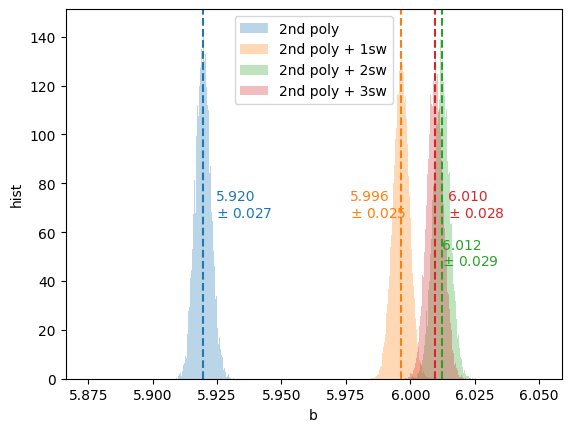

In [5]:
# collect model to list
fit_model_list = [
    Model_2nd,
    Model_2nd_1sw,
    Model_2nd_2sw,
    Model_2nd_3sw
]

b_bins = np.linspace(5.875, 6.05, 1000)
Mean=[]
Std=[]
for idx, fit_model in enumerate(fit_model_list):
    p = plt.hist(
        fit_model.flat_samples[:,1], bins=b_bins,
        density=True,
        alpha=0.3, color=f'C{idx}',
        label=fit_model.model_label
    )
    max=p[0].max()
    mean=fit_model.flat_samples[:,1].mean()
    t=0
    for i in range(len(b_bins)):
        t += (b_bins[i] - mean)**2
    std = np.sqrt(t / np.sum(b_bins))
    Mean.append(mean)
    Std.append(std)
    plt.axvline(x=mean,color=f'C{idx}', linestyle="--")
plt.text(Mean[0]+0.005,max/2,"{:.3f}\n$\pm$ {:.3f}".format(Mean[0],Std[0]),color=f'C{0}')
plt.text(Mean[1]-0.02,max/2,"{:.3f}\n$\pm$ {:.3f}".format(Mean[1],Std[1]),color=f'C{1}')
plt.text(Mean[2],max/2-20,"{:.3f}\n$\pm$ {:.3f}".format(Mean[2],Std[2]),color=f'C{2}')
plt.text(Mean[3]+0.005,max/2,"{:.3f}\n$\pm$ {:.3f}".format(Mean[3],Std[3]),color=f'C{3}')
plt.xlabel("b")
plt.ylabel("hist")
plt.legend()
plt.savefig('./Results/b_93.png')
plt.show()

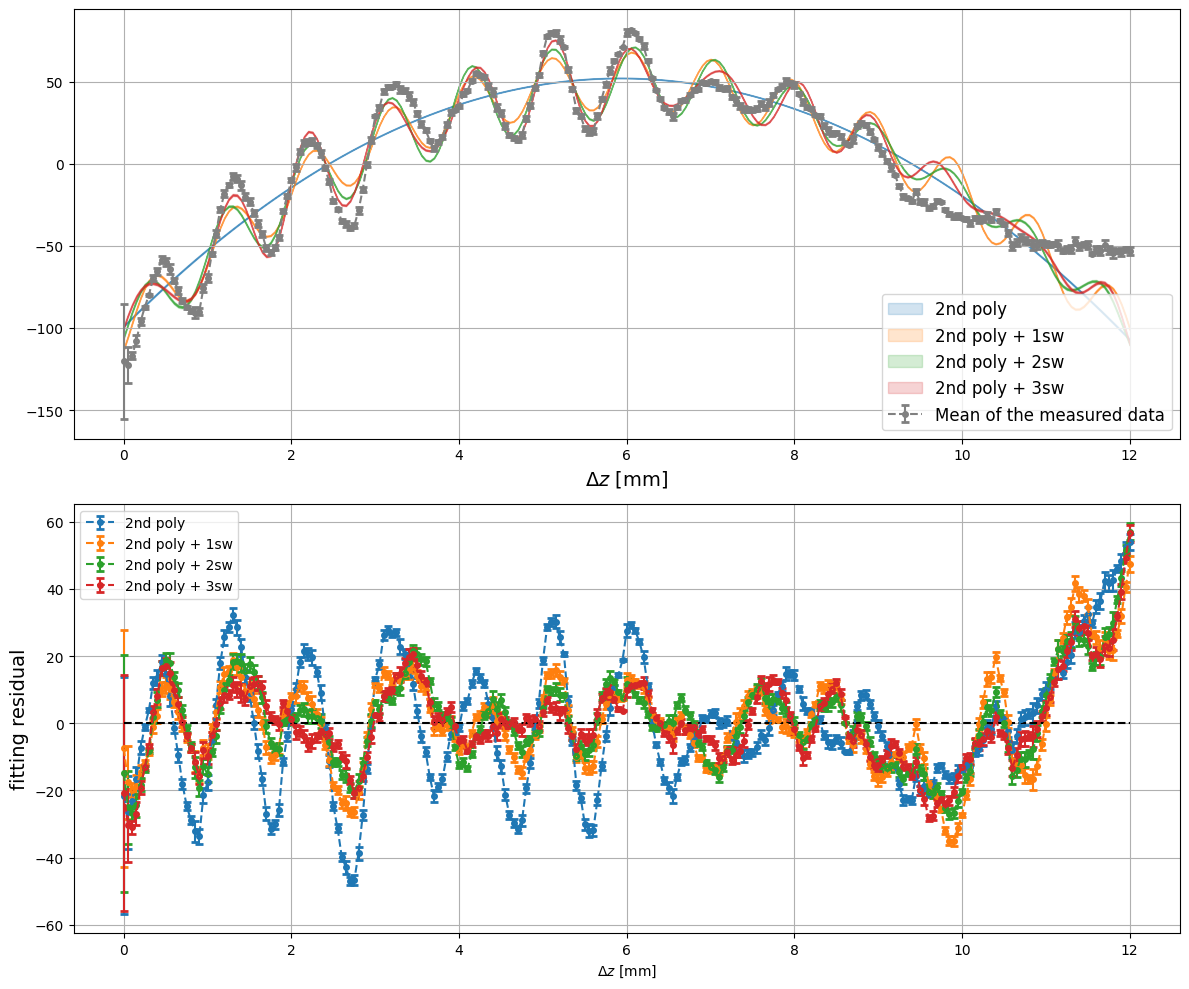

In [6]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.errorbar(
    Model_2nd.x_vec,
    Model_2nd.y_mean,
    yerr=Model_2nd.y_err,
    marker='.', ls='--', color=f'gray',
    label=f"Mean of the measured data",
    capsize=3, markeredgewidth=2,
    fillstyle='none'
)

for idx, fit_model in enumerate(fit_model_list):
    pred_res = fit_model.model_batch(fit_model.flat_samples)
    model_quantil = np.quantile(
        pred_res,
        [0.025, 0.16, 1-0.16, 1-0.025],
        axis=-1
    )
    plt.fill_between(
        fit_model.x_vec,
        y1=model_quantil[0],
        y2=model_quantil[-1],
        color=f"C{idx}",
        alpha=0.2,
        label=fit_model.model_label
    )
    plt.fill_between(
        fit_model.x_vec,
        y1=model_quantil[1],
        y2=model_quantil[-2],
        color=f"C{idx}",
        alpha=0.6,
        #label=fit_model.model_label
    )
plt.grid(which='both', axis='both')
plt.legend(fontsize=12)
plt.xlabel(r'$\Delta z$ [mm]',fontsize=14)

plt.subplot(212)
for idx, fit_model in enumerate(fit_model_list):
    param_mean = np.atleast_2d(fit_model.flat_samples.mean(axis=0))
    pred_res = fit_model.model_batch(param_mean)[:,0]
    plt.errorbar(
        fit_model.x_vec,
        fit_model.y_mean-pred_res,
        yerr=fit_model.y_err,
        marker='.', ls='--', color=f'C{idx}',
        label=fit_model.model_label,
        capsize=3, markeredgewidth=2,
        fillstyle='none'
    )
plt.hlines(y=0, xmin=0, xmax=12, color='k', ls='--')
plt.grid(which='both', axis='both')
plt.legend()
plt.xlabel(r'$\Delta z$ [mm]')
plt.ylabel('fitting residual',fontsize=14)

plt.tight_layout()
plt.savefig('./Results/result_93cm.png')


In [6]:
##inputs
Data_folder_freq=Data_folder+'scan_freq/'
keywords='freq*'
outputfolder='./Results/93cm/'
c=299792458*1000#mm/s

In [7]:
# 1. read data
D_folder=PurePath(Data_folder_freq)
data_file_list = sorted(glob(str(D_folder / keywords)))
data_list1 = [
    np.genfromtxt(data_file) for data_file in data_file_list
]
freq = data_list1[0][:,0]/1000*12
df=np.diff(freq).mean()
Spec0=data_list1[0][:,1]-data_list1[0][:,1].mean()
Spec1=data_list1[1][:,1]-data_list1[1][:,1].mean()

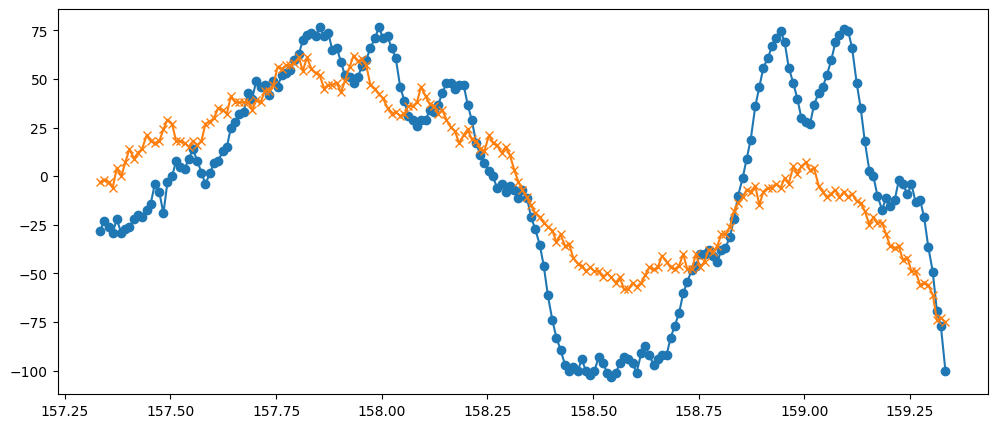

In [8]:
fig = plt.figure(figsize=(12,5))
plt.plot(freq, Spec0, marker='o', linestyle='-')
plt.plot(freq, Spec1, marker='x', linestyle='-')


In [46]:
SPEC0=fft.fftshift(fft.fft(Spec0)/(len(Spec0)// 2))
SPEC1=fft.fftshift(fft.fft(Spec1)/(len(Spec1)// 2))
Filter=np.zeros(SPEC0.size)
n=4
Filter[100-n:100+n]=1

(0.01, 100)

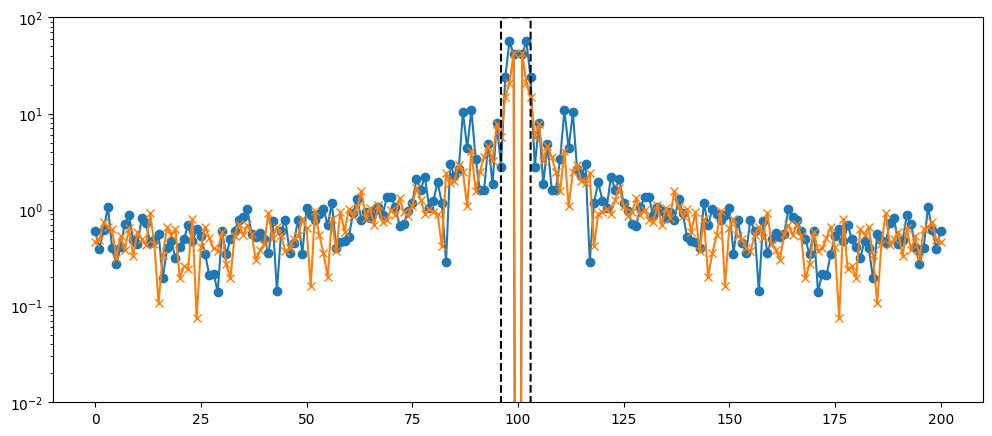

In [47]:
fig = plt.figure(figsize=(12,5))
plt.plot(np.abs(SPEC0)[:], marker='o', linestyle='-')
plt.plot(np.abs(SPEC1)[:], marker='x', linestyle='-')
plt.plot(100*Filter,'k--')
plt.yscale('log')
plt.ylim([0.01,100])


In [48]:
data0=fft.ifft(fft.ifftshift(fft.fftshift(fft.fft(Spec0))*Filter))
data1=fft.ifft(fft.ifftshift(fft.fftshift(fft.fft(Spec1))*Filter))

c:\Users\xiaod\.conda\envs\CCATholo\lib\site-packages\matplotlib\cbook.py:1698: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\xiaod\.conda\envs\CCATholo\lib\site-packages\matplotlib\cbook.py:1344: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


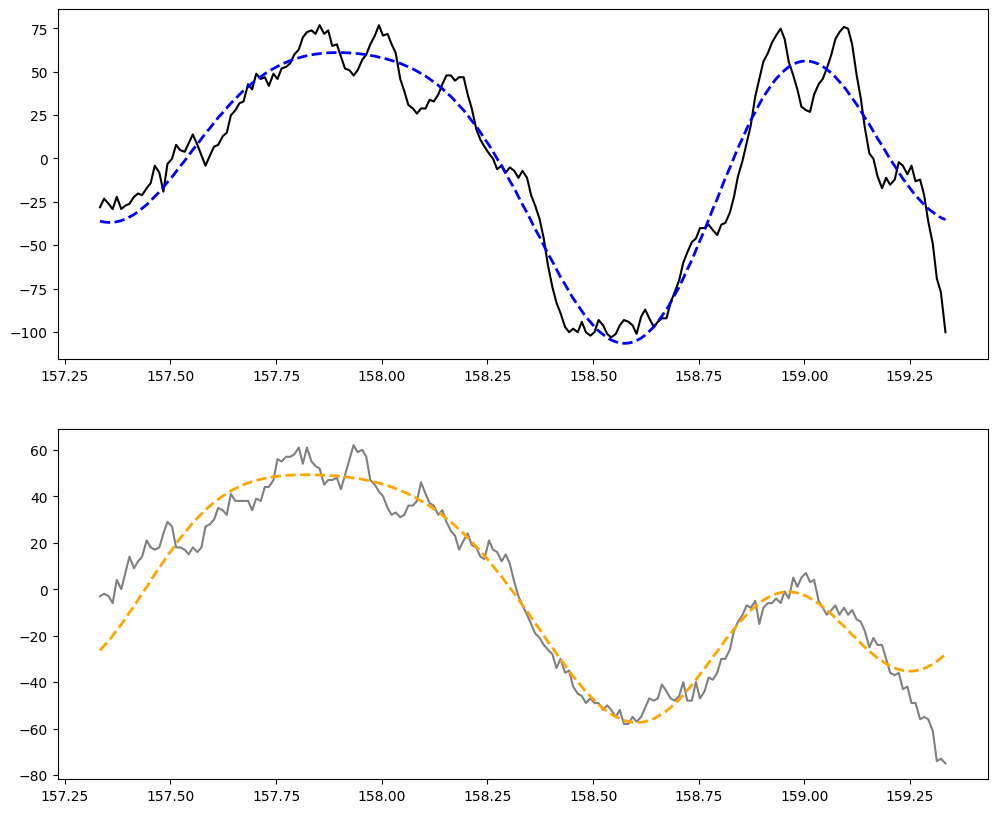

In [50]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(freq, Spec0, marker='', linestyle='-',color='k')
plt.plot(freq, data0, marker='', linestyle='--',color='blue',linewidth=2)
plt.subplot(212)
plt.plot(freq, Spec1, marker='', linestyle='-',color='gray')
plt.plot(freq, data1, marker='', linestyle='--',color='orange',linewidth=2)